<a href="https://colab.research.google.com/github/swapnilbpatil/Required-Notebook/blob/main/EDA_High_Rated_Games_on_Google_Playstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


In [18]:
data = pd.read_csv("path.csv")

In [19]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [20]:
data.shape

(10841, 13)

In [21]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# **Task 1 :- Data Loading**

In [22]:
# Successfuly Load

(array([2.000e+02, 7.249e+03, 1.917e+03, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. , 11.8, 13.6, 15.4, 17.2, 19. ]),
 <a list of 10 Patch objects>)

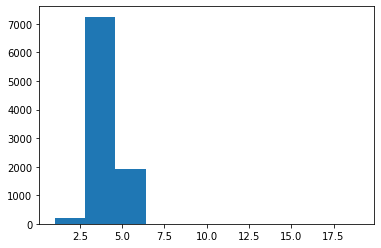

In [23]:
plt.hist(data["Rating"])
# or
#df["Rating"].plot(kind = hist)

(array([  17.,   18.,   41.,   74.,  137.,  446.,  879., 1662., 4175.,
        1917.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

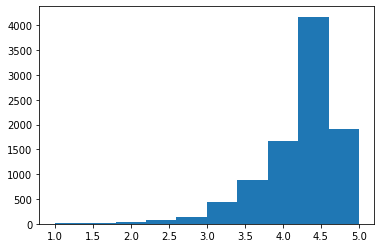

In [24]:
data = data[data['Rating'] <= 5]
plt.hist(data['Rating'])
# OR
#data = data[data['Rating'] <= 5]
#data['Rating'].plot(kind='hist')

# **Task 2 :- Null Value Treatment**

In [25]:
total_null = data.isnull().sum()

In [26]:
total_null

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

In [27]:
percent_null = (total_null/data.isnull().count())

In [28]:
percent_null

App               0.000000
Category          0.000000
Rating            0.000000
Reviews           0.000000
Size              0.000000
Installs          0.000000
Type              0.000000
Price             0.000000
Content Rating    0.000000
Genres            0.000000
Last Updated      0.000000
Current Ver       0.000427
Android Ver       0.000214
dtype: float64

In [29]:
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total', 'Percent'])

In [30]:
missing_data 

,Total,Percent
App,0,0.000000
Category,0,0.000000
Rating,0,0.000000
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000
Type,0,0.000000
Price,0,0.000000
Content Rating,0,0.000000
Genres,0,0.000000


In [31]:
data_1 = data.dropna()

In [32]:
data_1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [33]:
total_null_1 = data_1.isnull().sum()

In [34]:
total_null_1

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [35]:
percent_null_1 = (total_null_1/data_1.isnull().count())

In [36]:
percent_null_1

App               0.0
Category          0.0
Rating            0.0
Reviews           0.0
Size              0.0
Installs          0.0
Type              0.0
Price             0.0
Content Rating    0.0
Genres            0.0
Last Updated      0.0
Current Ver       0.0
Android Ver       0.0
dtype: float64

In [37]:
missing_data_1 = pd.concat([total_null_1, percent_null_1], axis=1, keys=['Total', 'Percent'])

In [38]:
missing_data_1

,Total,Percent
App,0,0.0
Category,0,0.0
Rating,0,0.0
Reviews,0,0.0
Size,0,0.0
Installs,0,0.0
Type,0,0.0
Price,0,0.0
Content Rating,0,0.0
Genres,0,0.0


# **Task 3 :- Category vs Rating**

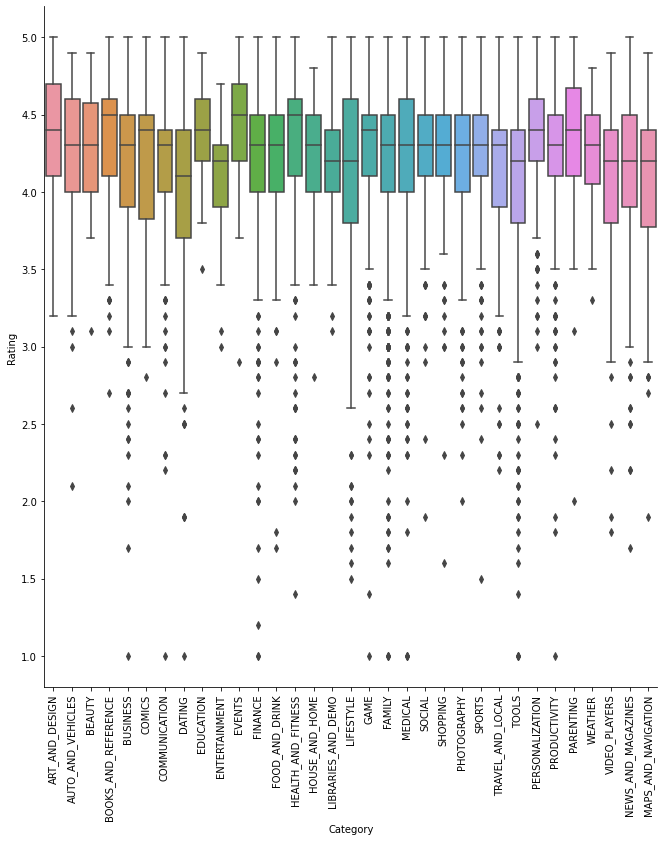

In [39]:
a = sns.catplot(x="Category",y="Rating",data=data,kind="box",height = 10)
a.set_xticklabels(rotation=90)
a.set_titles('Rating vs Category [BoxPlot]')

# **Task 4 :- Installs vs Ratings**

In [40]:
data["Installs"].value_counts()

1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [41]:
data['Installs'] = data['Installs'].str.replace('+','').str.replace(',', '')
data.sort_values('Installs')
data['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9366, dtype: object

In [42]:
data['Installs'] = data['Installs'].astype(int)

In [43]:
data['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9366, dtype: int64

In [44]:
le = LabelEncoder()
le.fit(data['Installs'])
data['Installs']=le.transform(data['Installs'])

In [45]:
data['Installs']

0         8
1        11
2        13
3        15
4        10
         ..
10834     5
10836     7
10837     4
10839     6
10840    14
Name: Installs, Length: 9366, dtype: int64

Text(0.5, 1.0, 'Rating vs Installs [RegPlot]')

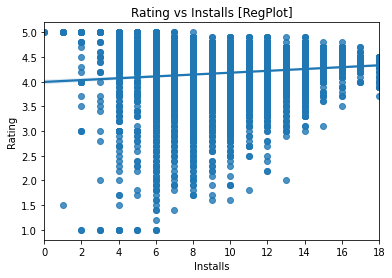

In [46]:
a = sns.regplot(x="Installs", y="Rating",data=data)
a.set_title('Rating vs Installs [RegPlot]')

# **Task 5 :- Price vs Ratings**

In [47]:
#value counts of Price
data['Price'].value_counts()

0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.50         1
$2.50         1
$299.99       1
$15.46        1
$6.49         1
Name: Price, Length: 73, dtype: int64

In [48]:
##Remove dollar sign from Price
data['Price'] = data['Price'].str.replace('$','')

In [49]:
data['Price']

0        0
1        0
2        0
3        0
4        0
        ..
10834    0
10836    0
10837    0
10839    0
10840    0
Name: Price, Length: 9366, dtype: object

In [50]:
#Convert the Price column to datatype float
data['Price'] = data['Price'].astype(float)

In [51]:
data['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9366, dtype: float64

Text(0.5, 1.0, 'Rating vs Price [RegPlot]')

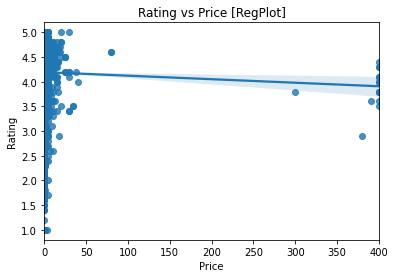

In [52]:
#Using seaborn, plot the regplot
a = sns.regplot(x="Price", y="Rating",data=data)
a.set_title('Rating vs Price [RegPlot]')

# **Task 6 :- Genre vs Rating** 

In [53]:
a = data['Genres'].unique()
a

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [54]:
data['Genres'] = data['Genres'].str.split(';', n=1, expand=True)

In [55]:
data['Genres']

0             Art & Design
1             Art & Design
2             Art & Design
3             Art & Design
4             Art & Design
               ...        
10834            Education
10836            Education
10837            Education
10839    Books & Reference
10840            Lifestyle
Name: Genres, Length: 9366, dtype: object

In [56]:
gr_mean = data.groupby(['Genres'], as_index=False)['Rating'].mean()

In [57]:
gr_mean 

,Genres,Rating
0,Action,4.286667
1,Adventure,4.219101
2,Arcade,4.308072
3,Art & Design,4.349231
4,Auto & Vehicles,4.190411
5,Beauty,4.278571
6,Board,4.300000
7,Books & Reference,4.344444
8,Business,4.121452
9,Card,4.102083


In [58]:
gr_mean.describe()

,Rating
count,48.000000
mean,4.212051
std,0.103459
min,3.970769
25%,4.132114
50%,4.204821
75%,4.286532
max,4.435556


In [59]:
gr_mean = gr_mean.sort_values(['Rating'])

In [60]:
gr_mean

,Genres,Rating
14,Dating,3.970769
44,Trivia,4.039286
42,Tools,4.047411
25,Maps & Navigation,4.051613
45,Video Players & Editors,4.063190
24,Lifestyle,4.095556
17,Entertainment,4.101386
9,Card,4.102083
43,Travel & Local,4.109292
16,Educational,4.109709


## **Task 7 :- Last Updated vs Rating**

In [61]:
data['Last Updated']

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10834       June 18, 2017
10836       July 25, 2017
10837        July 6, 2018
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 9366, dtype: object

In [62]:
data['Last Updated'] =  pd.to_datetime(data['Last Updated'])
data['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10834   2017-06-18
10836   2017-07-25
10837   2018-07-06
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 9366, dtype: datetime64[ns]

In [63]:
max_date = data['Last Updated'].max()
max_date

Timestamp('2018-08-08 00:00:00')

In [64]:
data['Last Updated Days'] = (max_date - data['Last Updated']).dt.days

In [65]:
data['Last Updated Days']

0         213
1         205
2           7
3          61
4          49
         ... 
10834     416
10836     379
10837      33
10839    1297
10840      14
Name: Last Updated Days, Length: 9366, dtype: int64

Text(0.5, 1.0, 'Rating vs Last Updated [RegPlot]')

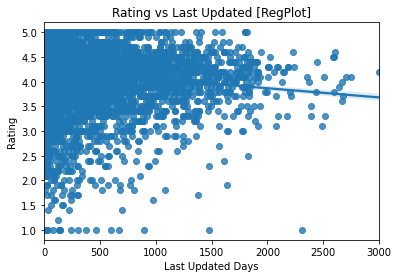

In [66]:
#Using seaborn, plot the regplot
a = sns.regplot(x="Last Updated Days", y="Rating",data=data)
a.set_title('Rating vs Last Updated [RegPlot]')